# Look at a set of realizations

In reponse to [this issue on GitHub](https://github.com/seg/2016-ml-contest/issues/114) I have started doing stochastic evaluations — running each model instantiation and prediction 100 times.

As described in that thread, I'm doing more or less this:

    y_pred = []
    for seed in range(100):
        np.random.seed(seed)
        clf = RandomForestClassifier(<hyperparams>, random_state=seed,  n_jobs=-1)
        clf.fit(X, y)    
        y_pred.append(clf.predict(X_test))
        print('.', end='')
    np.save('100_realizations.npy', y_pred)
    
I then evaluate against the blind data, which results in 100 F1 scores — that's the `npy` file you load here. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ls -l *_f1.npy

-rw-r--r--@ 1 matt  staff  880 20 Jan 10:59 HouMath_100_realizations_f1.npy
-rw-r--r--@ 1 matt  staff  880 20 Jan 11:48 ar4_100_realizations_f1.npy
-rw-r--r--@ 1 matt  staff  880 20 Jan 10:59 geoLEARN_100_realizations_f1.npy
-rw-r--r--@ 1 matt  staff  880 20 Jan 10:59 ispl_100_realizations_f1.npy


In [3]:
accs = np.load('ar4_100_realizations_f1.npy')
s = pd.Series(accs)

## Look at some statistics

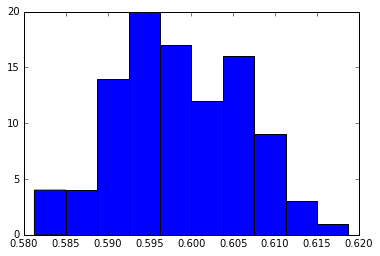

In [4]:
plt.hist(accs)
plt.show()

In [5]:
s.describe()

count    100.000000
mean       0.598425
std        0.007556
min        0.581250
25%        0.592500
50%        0.598125
75%        0.603750
max        0.618750
dtype: float64

In [6]:
np.median(s)

0.59812500000000002